In [ ]:
# mount the google drive on colab platform

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Dissertation/data/Historical_Data.xlsx")

In [ ]:
df.head(5)

,match_id,start_date,venue,innings,batting_team,bowling_team,striker,bowler,completed_over,ball_no,runs_off_bat,extras,wicket_type,fall_of_wicket,Cumulative_Runs,FoW,SR
0,1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,SL Malinga,0,1,0,0,NaN,0,0,0,0
1,1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,SL Malinga,0,2,0,0,NaN,0,0,0,0
2,1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,SL Malinga,0,3,1,0,NaN,0,1,0,1
3,1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,SL Malinga,0,4,2,0,NaN,0,3,0,2
4,1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,SL Malinga,0,5,0,0,NaN,0,3,0,0


In [ ]:
df.dtypes

match_id            int64
start_date         object
venue              object
innings             int64
batting_team       object
bowling_team       object
striker            object
bowler             object
completed_over      int64
ball_no             int64
runs_off_bat        int64
extras              int64
wicket_type        object
fall_of_wicket      int64
Cumulative_Runs     int64
FoW                 int64
SR                  int64
dtype: object

In [ ]:
# Convert columns to more memory-efficient data types
df['match_id'] = df['match_id'].astype('category')
df['start_date'] = pd.to_datetime(df['start_date'])
df['venue'] = df['venue'].astype('category')
df['innings'] = df['innings'].astype('category')
df['batting_team'] = df['batting_team'].astype('category')
df['bowling_team'] = df['bowling_team'].astype('category')
df['striker'] = df['striker'].astype('category')
df['bowler'] = df['bowler'].astype('category')
df['completed_over'] = df['completed_over'].astype('category')
df['ball_no'] = df['ball_no'].astype('category')
df['runs_off_bat'] = pd.to_numeric(df['runs_off_bat'], downcast='integer')
df['extras'] = pd.to_numeric(df['extras'], downcast='integer')
df['wicket_type'] = df['wicket_type'].astype('category')
df['fall_of_wicket'] = df['fall_of_wicket'].astype('category')
df['Cumulative_Runs'] = pd.to_numeric(df['Cumulative_Runs'], downcast='integer')
df['FoW'] = pd.to_numeric(df['FoW'], downcast='integer')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418509 entries, 0 to 418508
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   match_id         418509 non-null  category      
 1   start_date       418509 non-null  datetime64[ns]
 2   venue            418509 non-null  category      
 3   innings          418509 non-null  category      
 4   batting_team     418509 non-null  category      
 5   bowling_team     418509 non-null  category      
 6   striker          418509 non-null  category      
 7   bowler           418509 non-null  category      
 8   completed_over   418509 non-null  category      
 9   ball_no          418509 non-null  category      
 10  runs_off_bat     418509 non-null  int8          
 11  extras           418509 non-null  int8          
 12  wicket_type      23248 non-null   category      
 13  fall_of_wicket   418509 non-null  category      
 14  Cumulative_Runs  418

In [ ]:
df.columns

Index(['match_id', 'start_date', 'venue', 'innings', 'batting_team',
       'bowling_team', 'striker', 'bowler', 'completed_over', 'ball_no',
       'runs_off_bat', 'extras', 'wicket_type', 'fall_of_wicket',
       'Cumulative_Runs', 'FoW', 'SR'],
      dtype='object')

In [ ]:
df = df.drop('wicket_type', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding to categorical features

from sklearn.preprocessing import LabelEncoder
features = ['match_id', 'venue', 'innings', 'batting_team',
            'bowling_team', 'striker', 'bowler', 'completed_over', 'ball_no',
            'fall_of_wicket']
le = LabelEncoder()
for feature in features:
 le.fit(df[feature].unique())
 df[feature] = le.transform(df[feature])
 print(feature, df[feature].unique())

match_id [523 524 525 ... 520 521 522]
venue [127 185   1  25  79 124  12  54 208  42 190 166  70 228 112  69  34  51
 182  87 204  17 240 178 119 179 100 155 158 235 168 160 176  62  95  10
  56 144   6 173  71 212 201 142   8  84 233  68 184 205 180 139 210 110
  80 192 227  30  32  28 162 161  52  20 115  45 237 215  49 114  24   2
   4 194 120 148 107 111 104  39 105 198 106 152 163  76 151  92 195 147
 245 241  19 222  88 108 116 136  47 219   3 207 149 165 224 188 130  22
 218  81 145 134 191 209 213 202 211  37  41 101 230 232 220 159 137  44
 121 177 138 123  14  33  26 203  73  65 102  67 247  58  48 131  57  43
 175  96  53  21  83   7   9  50 174 113  78  89  94 226 238 187 140  63
  35  61  18  29 223  40 196 157 244  27 236 169 126 167 214  93  31 221
  13 125  77  55 225  98 109 153 229 164  72  11  85  75 242  91 170 234
 117 135  64 246 197  16  86 129 171  59 189 193 141  99 239  23  97  74
  36 217 122   0 150  15 154 186 143  46 133 199 183 118 132  90 200 172
 231 1

In [ ]:
df.columns

Index(['match_id', 'start_date', 'venue', 'innings', 'batting_team',
       'bowling_team', 'striker', 'bowler', 'completed_over', 'ball_no',
       'runs_off_bat', 'extras', 'fall_of_wicket', 'Cumulative_Runs', 'FoW',
       'SR'],
      dtype='object')

In [ ]:
df.isnull().sum()

match_id           0
start_date         0
venue              0
innings            0
batting_team       0
bowling_team       0
striker            0
bowler             0
completed_over     0
ball_no            0
runs_off_bat       0
extras             0
fall_of_wicket     0
Cumulative_Runs    0
FoW                0
SR                 0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

<ipython-input-168-5903f304415b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmax=0.9, square=True, cmap='coolwarm')


<Axes: >

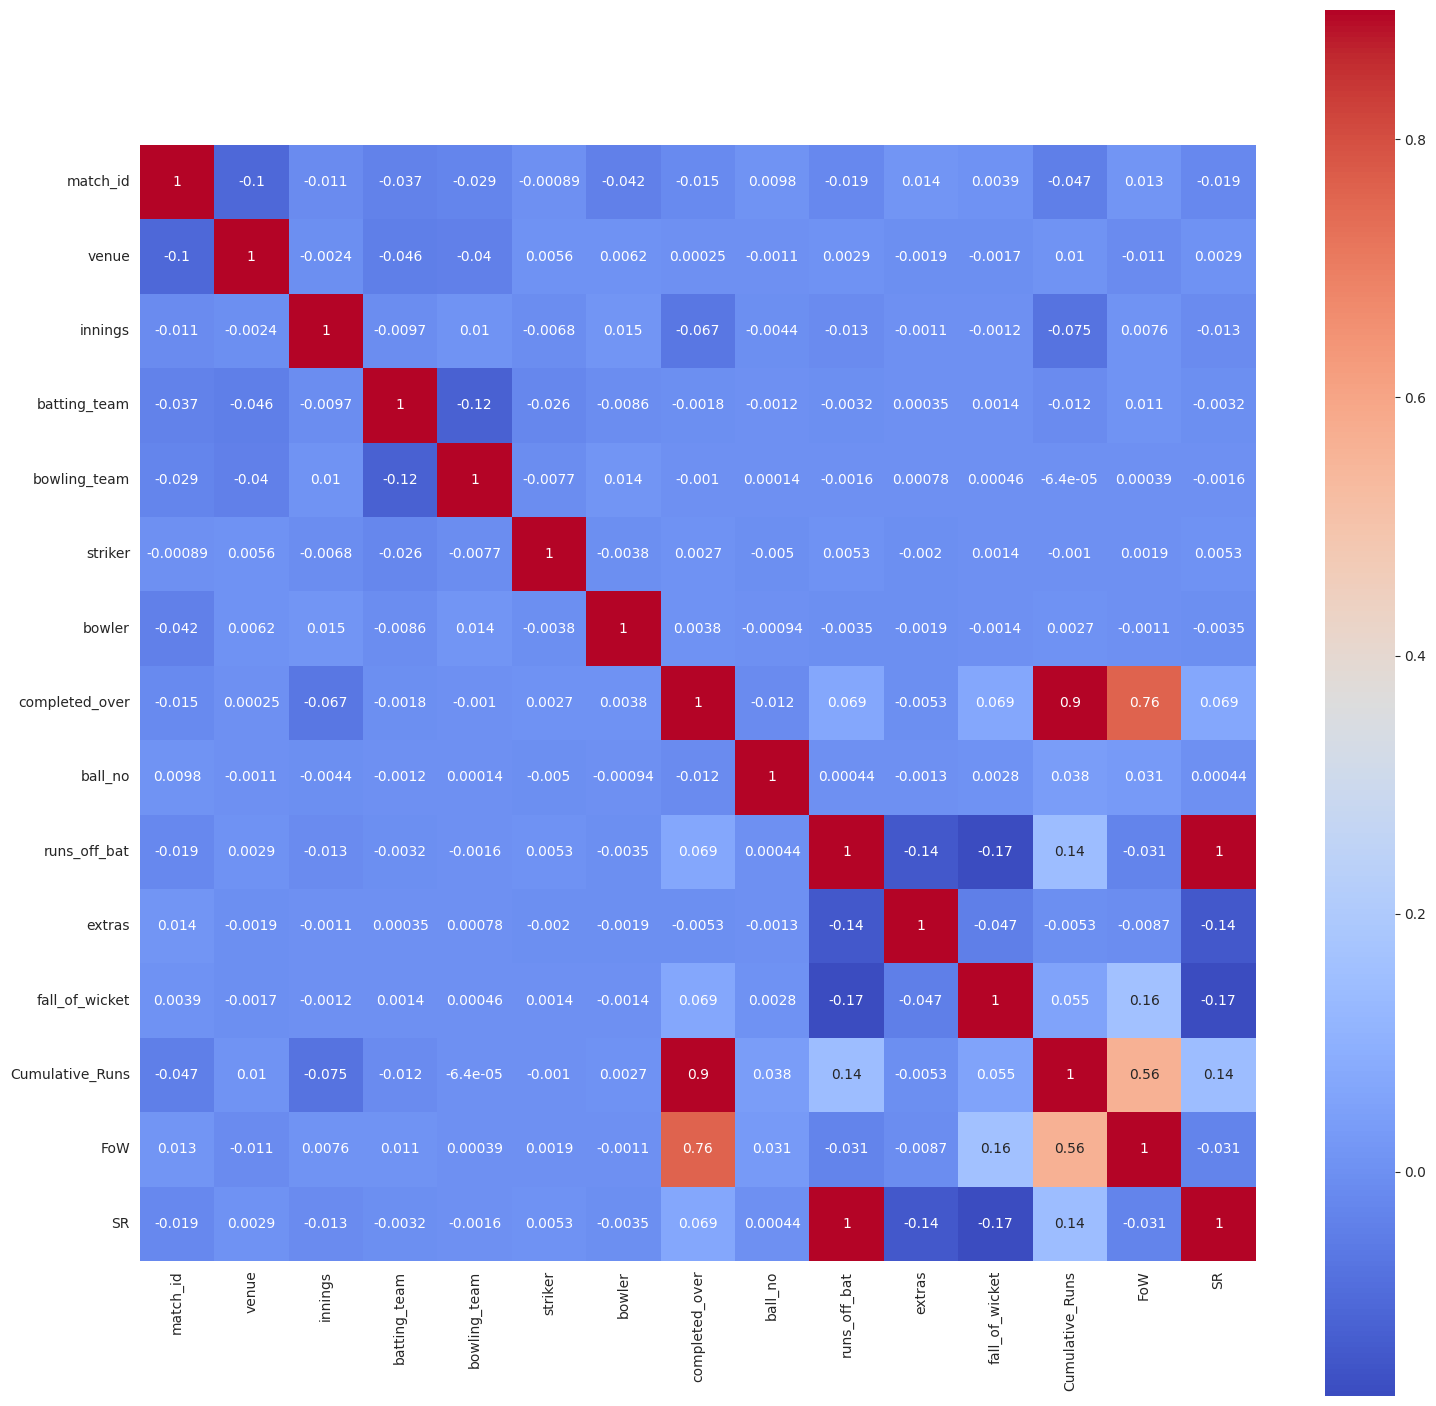

In [ ]:
#coorelation heatmap
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot = True, vmax=0.9, square=True, cmap='coolwarm')

In [ ]:
df.columns

Index(['match_id', 'start_date', 'venue', 'innings', 'batting_team',
       'bowling_team', 'striker', 'bowler', 'completed_over', 'ball_no',
       'runs_off_bat', 'extras', 'fall_of_wicket', 'Cumulative_Runs', 'FoW',
       'SR'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['start_date', 'runs_off_bat', 'Cumulative_Runs', 'FoW'], axis=1)
y = df['runs_off_bat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(313881, 12)
(104628, 12)
(313881,)
(104628,)


In [ ]:
X_train.shape

(313881, 12)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the hyperparameter space
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 10],
}

# Use a grid search to find the best hyperparameters for the model
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a decision tree regressor with the best hyperparameters
dt = DecisionTreeRegressor(**best_params)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.0


In [ ]:
#training accuracy
dt.score(X_train, y_train)

1.0

In [ ]:
#predicting the Run of the batter
d_pred = dt.predict(X_test)

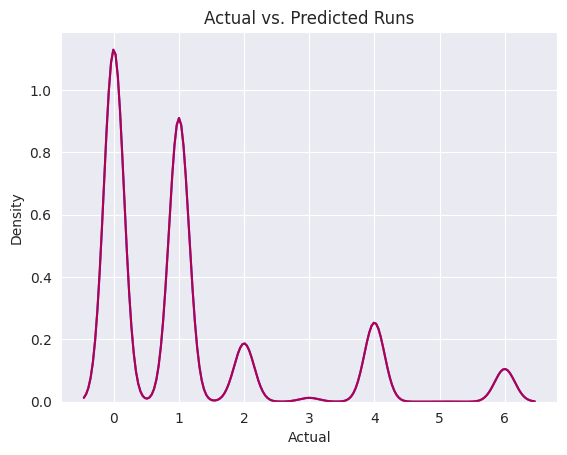

In [ ]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)

# Create a figure and a subplot
fig, ax = plt.subplots(1, 1)

# Plot the kdeplot for the actual runs
sns.kdeplot(dft['Actual'], color='blue', ax=ax)

# Plot the kdeplot for the predicted runs
sns.kdeplot(dft['Predicted'], color='red', ax=ax, alpha=0.7)

# Set the title of the plot
ax.set_title('Actual vs. Predicted Runs')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  1.0
Mean Squared Error:  0.0
Mean Absolute Error:  0.0
RMSE: 0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [ ]:
#training the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#training accuracy
rfg.score(X_train, y_train)

0.9999999829713966

In [ ]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)

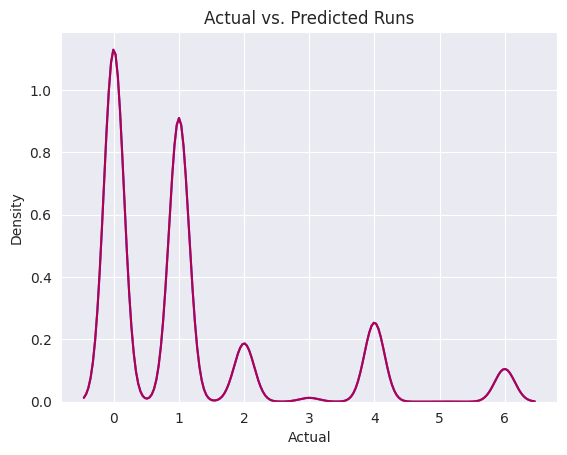

In [ ]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)

# Create a figure and a subplot
fig, ax = plt.subplots(1, 1)

# Plot the kdeplot for the actual runs
sns.kdeplot(dfr['Actual'], color='blue', ax=ax)

# Plot the kdeplot for the predicted runs
sns.kdeplot(dfr['Predicted'], color='red', ax=ax, alpha=0.7)

# Set the title of the plot
ax.set_title('Actual vs. Predicted Runs')

# Show the plot
plt.show()

In [ ]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  1.0
Mean Squared Error:  0.0
Mean Absolute Error:  0.0
RMSE: 0.0


Neural Network

In [ ]:
# import the tensorflow library

import tensorflow as tf
from tensorflow import keras

### Create and compile a 'deep' neural net
def create_model(layer_1=32, layer_2=64, layer_3=128, learning_rate=0.003, activation='relu' ):
    tf.random.set_seed(42)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(12,)),
        tf.keras.layers.Dense(layer_1, activation=activation),
        tf.keras.layers.Dense(layer_2, activation=activation),
        tf.keras.layers.Dense(layer_3, activation=activation),
        tf.keras.layers.Dense(10, activation='softmax')])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)

    return model

In [ ]:
def train_model(model, X_train, y_train):
    model.fit(x=X_train, y=y_train, epochs=10)

In [ ]:
X_train.shape

(313881, 12)

In [ ]:
y_train.shape

(313881,)

In [ ]:
from sklearn.metrics import accuracy_score

model = create_model(layer_1=32, layer_2=64,layer_3=128, learning_rate=0.003, activation='relu' )
trained_model = train_model(model, X_train, y_train)

# Evaluate the model
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]

print("\n The accuracy of the model is: {:.4f}".format(train_accuracy))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9809/9809 [==============================] - 23s 2ms/step - loss: 0.5706 - sparse_categorical_accuracy: 0.8558
Epoch 2/10
9809/9809 [==============================] - 24s 2ms/step - loss: 0.1076 - sparse_categorical_accuracy: 0.9748
Epoch 3/10
9809/9809 [==============================] - 21s 2ms/step - loss: 0.0579 - sparse_categorical_accuracy: 0.9869
Epoch 4/10
9809/9809 [==============================] - 23s 2ms/step - loss: 0.3479 - sparse_categorical_accuracy: 0.8585
Epoch 5/10
9809/9809 [==============================] - 22s 2ms/step - loss: 0.6579 - sparse_categorical_accuracy: 0.7146
Epoch 6/10
9809/9809 [==============================] - 21s 2ms/step - loss: 0.1037 - sparse_categorical_accuracy: 0.9642
Epoch 7/10
9809/9809 [==============================] - 23s 2ms/step - loss: 0.1317 - sparse_categorical_accuracy: 0.9504
Epoch 8/10
9809/9809 [==============================] - 24s 2ms/step - loss: 0.2308 - sparse_categorical_accuracy: 0.9125
Epoch 9/10
9809/9809 [=============

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



 The accuracy of the model is: 0.9950


In [ ]:
# Evaluate the model
test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', test_accuracy[0])
print('Test accuracy:', test_accuracy[1])

Test loss: 0.12659312784671783
Test accuracy: 0.9949917793273926


In [ ]:
pred = model.predict(X_test)

3270/3270 [==============================] - 4s 1ms/step


In [ ]:
y_test

115281    0
343423    4
98139     4
3348      1
183171    0
         ..
198851    0
404341    0
199216    1
177929    0
21133     2
Name: runs_off_bat, Length: 104628, dtype: int8

In [ ]:
pred = np.argmax(pred, axis = 1)

In [ ]:
len(pred)

104628

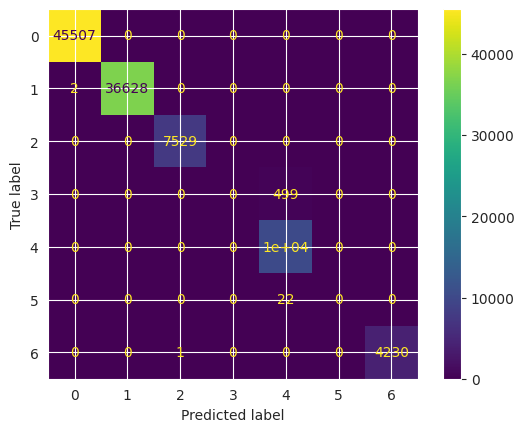

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, pred)

cm_display = ConfusionMatrixDisplay(cm).plot()